# Анализ показателей приложения Procrastinate Pro+

Для анализа представлены данные развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Требуется разобраться в причинах и помочь компании выйти в плюс. Для анализа были представлены датасеты, содержащие данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года: лог сервера с данными об их посещениях, выгрузка их покупок за этот период и рекламные расходы.

**Цели исследования**

- Выявить причину неэффективной работы компании.
- Сформулировать рекомендации для выхода на уровень окупаемости и выше.

**Ход исследования**

Данные представлены в трех датасетах. О качестве данных ничего не известно, поэтому перед основным исследованием потребуется обзор данных. Надо проверить даные на ошибки, пропуски и дубликаты. Если они есть, надо найти возможность исправить некорректные данные.

Таким образом, исследоваание будет состоять из восьми этапов:

- Загрузка данных и подготовка данных к анализу
- Задание функции для расчёта и анализа бизнес-показателей
- Исследовательский анализ данных
- Оценка расходов на рекламу
- Оценка окупаемости рекламы
- Выработки рекомендации для отдела маркетинга
- Общий вывод

## Загрузка данных и подготовка их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
try: 
    visits = pd.read_csv('d:/practicum/7sprint/visits_info_short.csv', parse_dates=[4, 5])
    orders = pd.read_csv('d:/practicum/7sprint/orders_info_short.csv')
    costs = pd.read_csv('d:/practicum/7sprint/costs_info_short.csv')

except:
    visits = pd.read_csv('/datasets/visits_info_short.csv', parse_dates=[4, 5])
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')

### Первичная оценка представленного датаесета

In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   User Id        309901 non-null  int64         
 1   Region         309901 non-null  object        
 2   Device         309901 non-null  object        
 3   Channel        309901 non-null  object        
 4   Session Start  309901 non-null  datetime64[ns]
 5   Session End    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


В таблице visits 309901 строк. Non-Null значений во всех колонках столько же - значит пропусков нет. Названия всех колонок надо привести к стилю python. Данные в колонке session_start	и session_end надо преобразовать к типу datetime

In [4]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
visits.head()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


В таблице orders 40212 строк. Non-Null значений во всех колонках столько же - значит пропусков нет. Названия всех колонок надо привести к стилю python. Данные в колонке event_dt надо преобразовать к типу datetime

In [6]:
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
orders['day'] = pd.to_datetime(orders['event_dt']).dt.date 
orders.head()

,user_id,event_dt,revenue,day
0,188246423999,2019-05-01 23:09:52,4.99,2019-05-01
1,174361394180,2019-05-01 12:24:04,4.99,2019-05-01
2,529610067795,2019-05-01 11:34:04,4.99,2019-05-01
3,319939546352,2019-05-01 15:34:40,4.99,2019-05-01
4,366000285810,2019-05-01 13:59:51,4.99,2019-05-01


In [7]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


В таблице costs 1800 строк. Non-Null значений во всех колонках столько же - значит пропусков нет. Названия всех колонок надо привести к стилю python. Данные в колонке dt надо преобразовать к типу datetime

In [8]:
costs.columns = costs.columns.str.lower().str.replace(' ', '_')
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 
costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.30
1,2019-05-02,FaceBoom,78.10
2,2019-05-03,FaceBoom,85.80
3,2019-05-04,FaceBoom,136.40
4,2019-05-05,FaceBoom,122.10


### Дубликаты в таблицах

In [9]:
print(visits.duplicated().sum(), orders.duplicated().sum(), costs.duplicated().sum())


0 0 0


Дубликатов во всех трех таблицах - нет

### Короткие сессии пользователей

In [10]:
visits['ses'] = (visits['session_start'] - visits['session_end']).dt.seconds

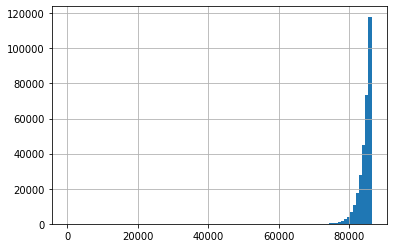

In [11]:
visits['ses'].hist(bins=100);

In [12]:
visits[visits['ses'] < 20000]

,user_id,region,device,channel,session_start,session_end,ses
100,172991619815,United States,Android,organic,2019-05-01 23:30:20,2019-05-01 23:30:20,0
396,70966634103,United States,iPhone,FaceBoom,2019-05-01 10:09:06,2019-05-01 10:09:06,0
6418,237822984474,United States,iPhone,FaceBoom,2019-05-08 11:44:29,2019-05-08 11:44:29,0
7658,691394091917,United States,iPhone,organic,2019-05-09 19:23:10,2019-05-09 19:23:10,0
8549,851693391616,United States,PC,TipTop,2019-05-10 03:28:02,2019-05-10 03:28:02,0
...,...,...,...,...,...,...,...
298392,869320035302,France,Mac,AdNonSense,2019-10-11 17:58:06,2019-10-11 17:58:06,0
300057,170196678386,France,PC,organic,2019-10-14 10:32:08,2019-10-14 10:32:08,0
302612,14571051192,Germany,iPhone,LeapBob,2019-10-18 13:33:12,2019-10-18 13:33:12,0
302852,716198028632,UK,Android,OppleCreativeMedia,2019-10-19 00:07:45,2019-10-19 00:07:45,0


Основное количество сессий длинной около 24 часов. "Нулевых" ссесий всего 163 из 300 тысяч. Тут проблем в данных нет.

***Промежуточный итог***


Загрузили данные. Пропусков в датасетах - нет. Дубликатов - нет. Других проблем в данных не обнаружено. Можно проводить анализ.

## Задаем функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [13]:
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].values.astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [14]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [15]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [16]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 


In [17]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [18]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [19]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [20]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 20))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(3, 2, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend(fontsize = 'x-large')
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(3, 2, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(3, 2, 5, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(3, 2, 2)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend(fontsize = 'x-large')
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(3, 2, 4, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

***Промежуточный итог***


Хорошо, что разрешено просто скопипастить эти функции =)

## Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

### Профили пользователей

In [21]:
profiles = get_profiles(visits, orders, [], costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.09
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.11
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.00
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.99
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.23


### Минимальная и максимальная даты привлечения пользователей

In [22]:
profiles['first_ts'].max()

Timestamp('2019-10-27 23:59:04')

In [23]:
profiles['first_ts'].min()

Timestamp('2019-05-01 00:00:41')

В представленном датасете содержаться данные с 1 мая 2019 года по 27 октября 2019 года. Что сооствевует периоду, указанному в задании

### Распределение пользователей по странам

Таблица количества пользователей и долю платящих для каждой страны

In [24]:
region_table = pd.concat([\
    profiles.groupby('region')['user_id'].nunique().sort_values(ascending=False),\
    profiles.query('payer == True').groupby('region')['user_id'].nunique().sort_values(ascending=False)],\
    axis=1)
region_table.columns = ['all_users', 'pay_users']
region_table['pay_proc'] = 100 * region_table['pay_users'] / region_table['all_users']
region_table

,all_users,pay_users,pay_proc
region,,,
United States,100002,6902,6.90
UK,17575,700,3.98
France,17450,663,3.80
Germany,14981,616,4.11


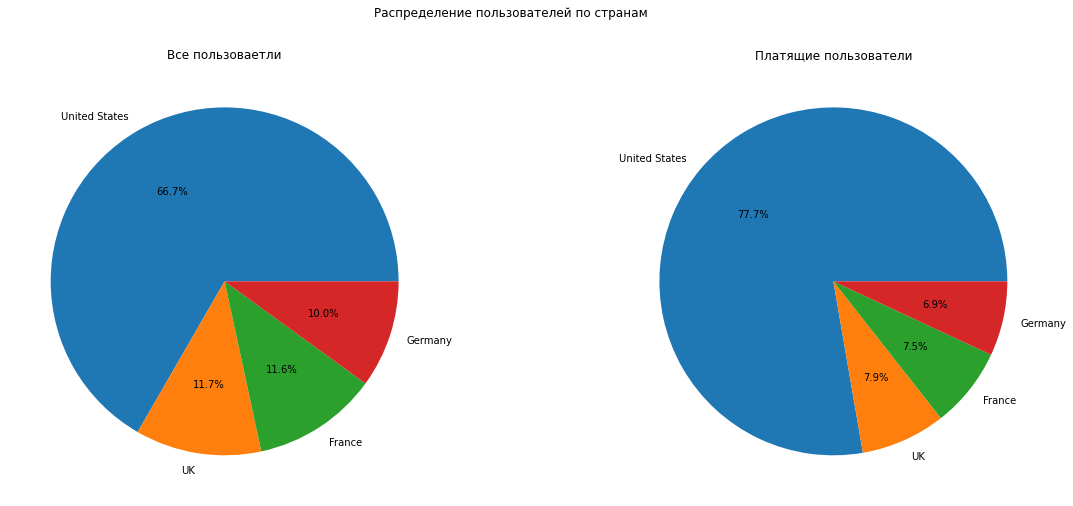

In [25]:
fig, axs = plt.subplots(nrows= 1, ncols= 2, figsize=(20, 8))
axs[0].pie(region_table['all_users'], labels = region_table.index, autopct='%1.1f%%');
axs[0].set_title('Все пользоваетли')
axs[1].pie(region_table['pay_users'], labels = region_table.index, autopct='%1.1f%%');
axs[1].set_title('Платящие пользователи')
plt.suptitle('Распределение пользователей по странам')
plt.show()

Таблица количества пользователей, предпочитающих различные стройства, и долю платящих для каждого устройства

In [26]:
device_table = pd.concat([\
    profiles.groupby('device')['user_id'].nunique().sort_values(ascending=False),\
    profiles.query('payer == True').groupby('device')['user_id'].nunique().sort_values(ascending=False)],\
    axis=1)
device_table.columns = ['all_users', 'pay_users']
device_table['pay_proc'] = 100 * device_table['pay_users'] / device_table['all_users']
device_table.style.format({'pay_proc': '{:.2f}'})

,all_users,pay_users,pay_proc
device,,,
iPhone,54479,3382,6.21
Android,35032,2050,5.85
PC,30455,1537,5.05
Mac,30042,1912,6.36


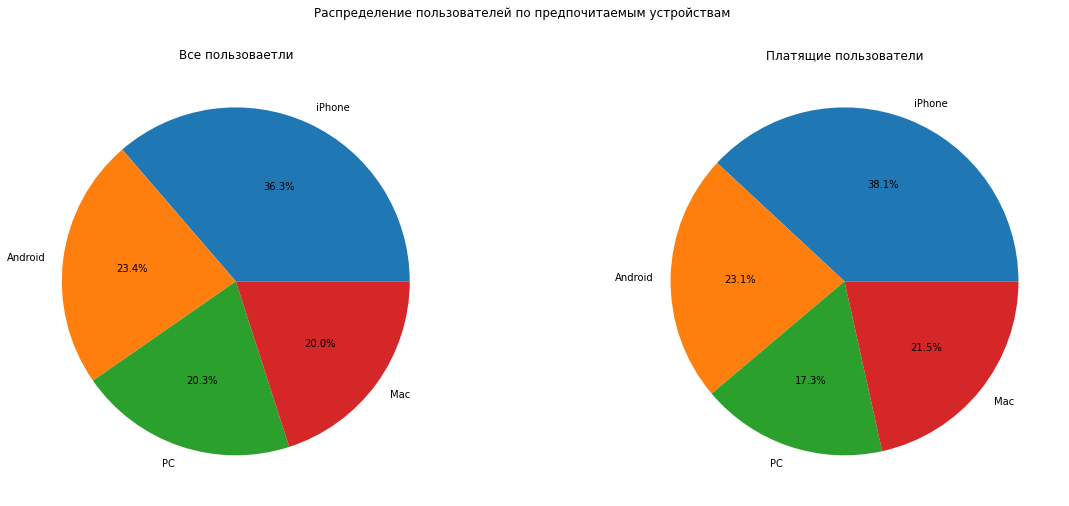

In [27]:
fig, axs = plt.subplots(nrows= 1, ncols= 2, figsize=(20, 8))
axs[0].pie(device_table['all_users'], labels = device_table.index, autopct='%1.1f%%');
axs[0].set_title('Все пользоваетли')
axs[1].pie(device_table['pay_users'], labels = device_table.index, autopct='%1.1f%%');
axs[1].set_title('Платящие пользователи')
plt.suptitle('Распределение пользователей по предпочитаемым устройствам')
plt.show()

Таблица каналов привлечения пользователей и доля платящих для каждого канала

In [28]:
channel_table = pd.concat([\
    profiles.groupby('channel')['user_id'].nunique(), \
    profiles.query('payer == True').groupby('channel')['user_id'].nunique()\
    ], axis=1)
channel_table.columns = ['all_users', 'pay_users']
channel_table['pay_proc'] = 100 * channel_table['pay_users'] / channel_table['all_users']
channel_table.sort_values(by='pay_proc', ascending=False)

,all_users,pay_users,pay_proc
channel,,,
FaceBoom,29144,3557,12.20
AdNonSense,3880,440,11.34
lambdaMediaAds,2149,225,10.47
TipTop,19561,1878,9.60
RocketSuperAds,4448,352,7.91
WahooNetBanner,8553,453,5.30
YRabbit,4312,165,3.83
MediaTornado,4364,156,3.57
LeapBob,8553,262,3.06


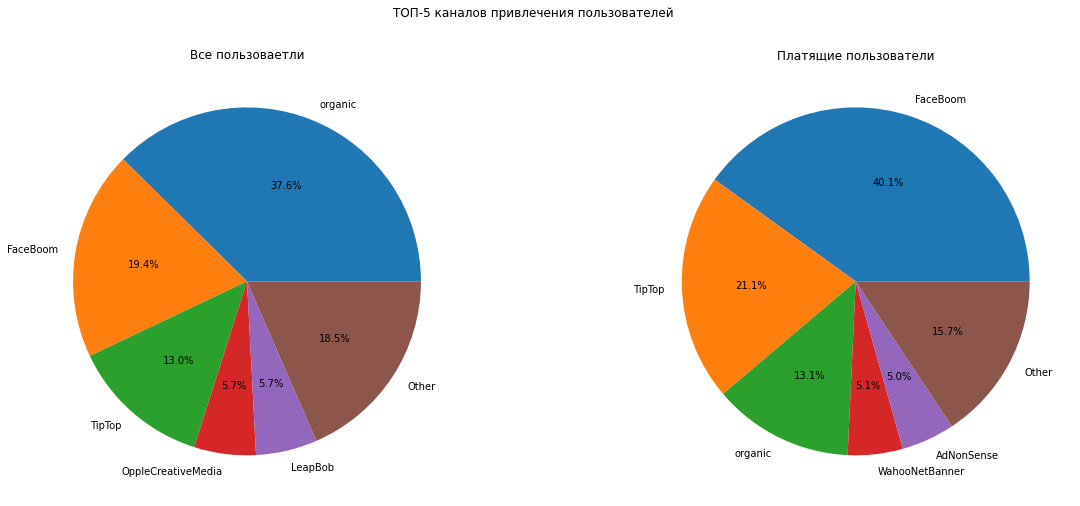

In [29]:
channel_top = channel_table['all_users'].sort_values(ascending=False).head(5)
channel_top['Other'] = channel_table['all_users'].sum() - channel_top.sum()

channel_top_payers = channel_table['pay_users'].sort_values(ascending=False).head(5)
channel_top_payers['Other'] = channel_table['pay_users'].sum() - channel_top_payers.sum()


fig, axs = plt.subplots(nrows= 1, ncols= 2, figsize=(20, 8))

axs[0].pie(channel_top, labels = channel_top.index, autopct='%1.1f%%');
axs[0].set_title('Все пользоваетли')
axs[1].pie(channel_top_payers, labels = channel_top_payers.index, autopct='%1.1f%%');
axs[1].set_title('Платящие пользователи')
plt.suptitle('ТОП-5 каналов привлечения пользователей')
plt.show()


 Интересно, как соотносятся каналы привлечения пользователей и страны. Возможно, есть какието каналы работают только в США, а другие в Европе.

In [30]:
profiles.query('region == "United States"').groupby('channel')['user_id'].nunique().sort_values(ascending=False)

channel
organic           38173
FaceBoom          29144
TipTop            19561
RocketSuperAds     4448
MediaTornado       4364
YRabbit            4312
Name: user_id, dtype: int64

In [31]:
profiles.query('region != "United States"').groupby('channel')['user_id'].nunique().sort_values(ascending=False)

channel
organic               18266
OppleCreativeMedia     8605
LeapBob                8553
WahooNetBanner         8553
AdNonSense             3880
lambdaMediaAds         2149
Name: user_id, dtype: int64

Действительно, половина каналов (FaceBoom, TipTop, RocketSuperAds, MediaTornado, YRabbit) работает толоько в США, другие пять каналов (OppleCreativeMedia, LeapBob, WahooNetBanner, AdNonSense и lambdaMediaAds) - в Европе.

А как соотносятся устройства и страны? тут тоже должна быть свзяь

In [32]:
profiles.query('region != "United States"').groupby('device')['user_id'].nunique().sort_values(ascending=False)

device
PC         20023
Android    14833
iPhone      9950
Mac         5200
Name: user_id, dtype: int64

In [33]:
profiles.query('region == "United States"').groupby('device')['user_id'].nunique().sort_values(ascending=False)

device
iPhone     44529
Mac        24842
Android    20199
PC         10432
Name: user_id, dtype: int64

Действительно, в США предпочитают iPhone Mac, а в Европе - PC и Android.

Похоже, используемые каналы привлечения пользователей определяют и их распределение по странан и устройствам.

***Промежуточный итог***


Пользователи сервиса привлекаются по 10 каналам, из которых половина работает только в США, а другая в Европе. Больше всего дают FaceBoom и TipTop. Среди платящих пользователей привлеченные FaceBoom и TipTop составляют более 60%. Остальные каналы дают по 5% и менее пользователей каждый. 

Каналы FaceBoom и TipTop работают только в США. Этим обусловлено подавляющие количество пользователей сервиса их этой страны а также распределение пользователей по используемым устроствам. Больше всего, около 40%, пользователей пользуется iPhone, остальные распределены поровну Android, PC, Mac. Такая пропорция характерна и для всех пользователей и только среди платящих. 

Треть всех пользователей сервиса - "органические", то есть пришли в сервис сами без рекламы, их привличение ничего не стоило компании.

## Оценка расходов на рекламу

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

### Доходы и расходы на рекламу

Построим графики динамики заказов, доходов с них и расходов на рекламу

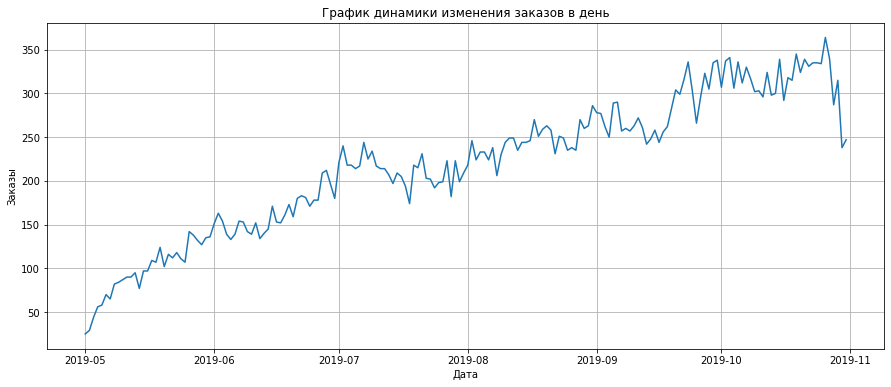

In [34]:
orders.groupby('day')['revenue'].count().plot(grid = True, figsize=(15, 6))
plt.xlabel('Дата')
plt.ylabel('Заказы')
plt.title('График динамики изменения заказов в день')
plt.show()

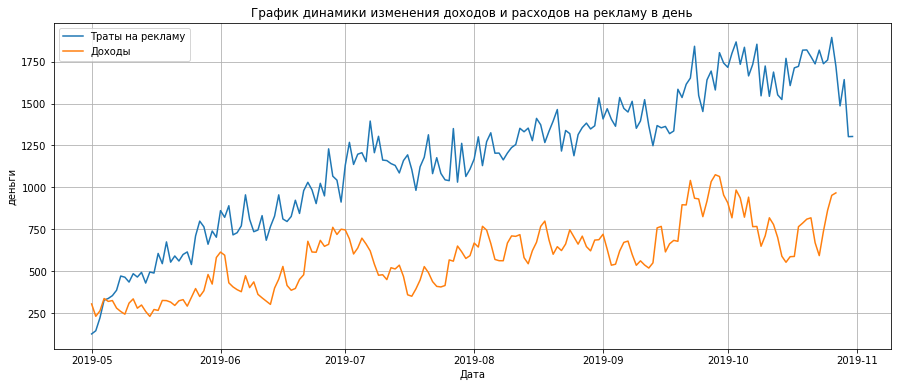

In [35]:
orders.groupby('day')['revenue'].sum().plot()
costs.groupby('dt')['costs'].sum().plot(grid = True, figsize=(15, 6))
plt.xlabel('Дата')
plt.ylabel('деньги')
plt.legend(labels = {'Доходы', 'Траты на рекламу'})
plt.title('График динамики изменения доходов и расходов на рекламу в день')
plt.show()

Заказы растут, доходы растут  - откуда же убытки ? 

In [36]:
costs['costs'].sum()

105497.30000000002

Траты на рекламу как сумма расходов на привлечение отдельных пользователей

In [37]:
profiles['acquisition_cost'].sum()

105497.29999999999

Суммы равны. Так и джолжно быть, функции работают корректно

Доход от всех заказов

In [38]:
orders['revenue'].sum()

215962.88

In [39]:
100 * costs['costs'].sum() / orders['revenue'].sum()

48.849737510446246

Сумма заказов более чем в два раза больше затрат на рекламу. 48% выручки развлекательного приложения Procrastinate Pro+ "съела" реклама. Если бы это были все затраты на приложение, то все было бы круто, но приложение, очевидно, имеет и другие статьи затрат - зарплаты сотрудников, аренда серверов и дт. И судя по убыточности компании, они больше оставшихся 52% выручки с продаж.

### Распределение трат по рекламным каналам

Оценим траты на рекламу по каналам

In [40]:
costs.groupby('channel')['costs'].sum().sort_values(ascending=False)

channel
TipTop               54751.30
FaceBoom             32445.60
WahooNetBanner        5151.00
AdNonSense            3911.25
OppleCreativeMedia    2151.25
RocketSuperAds        1833.00
LeapBob               1797.60
lambdaMediaAds        1557.60
MediaTornado           954.48
YRabbit                944.22
Name: costs, dtype: float64

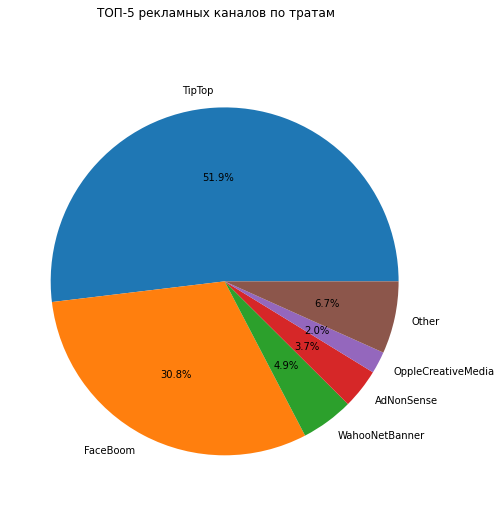

In [41]:
costs_top = costs.groupby('channel')['costs'].sum().sort_values(ascending=False).head(5)
costs_top['Other'] = costs['costs'].sum() - costs_top.sum()

fig = plt.figure(figsize = (10, 8)) 
plt.pie(costs_top, labels = costs_top.index, autopct='%1.1f%%');
plt.suptitle('ТОП-5 рекламных каналов по тратам')
plt.show()

В лидерах по тратам все те же TipTop и FaceBoom. На остальные приходится по 5% и менее, что соовтествует и доле привлеченных пользователей отдельными каналми

### Динамика изменения расходов на рекламу по каналам по неделям

In [42]:
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week

In [43]:
costs_week = costs.groupby(['channel', 'week'])['costs'].sum()

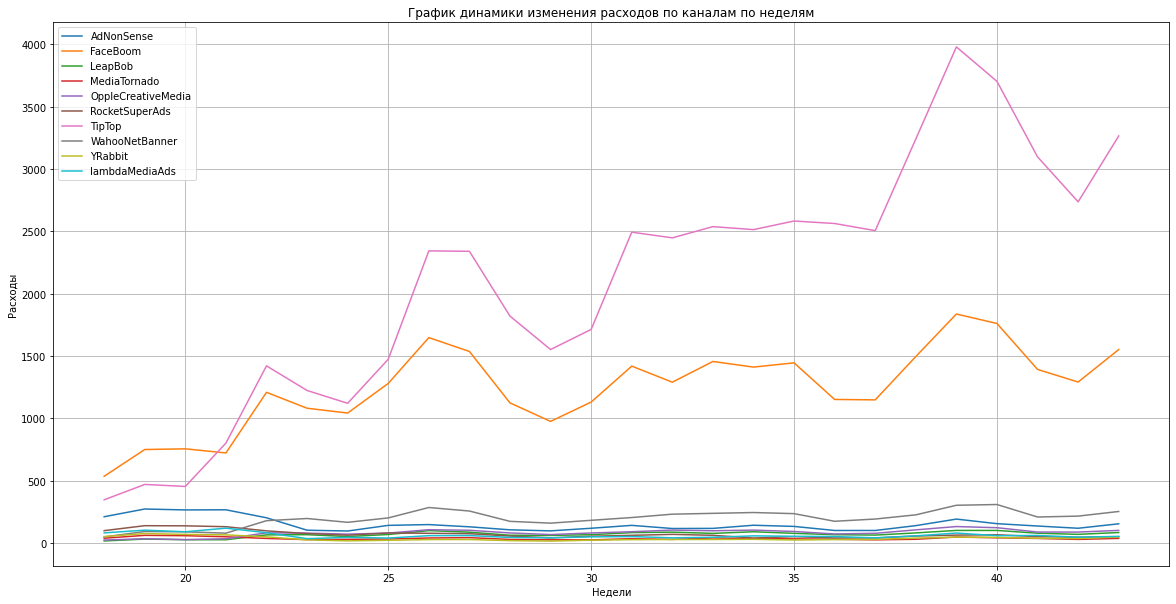

In [44]:
for source in costs_week.index.get_level_values(0).unique():
    costs_week[source].plot(grid = True, label=source, figsize=(20, 10))
plt.legend()
plt.xlabel('Недели')
plt.ylabel('Расходы')
plt.title('График динамики изменения расходов по каналам по неделям')
plt.show()

В "любимчиках" у отдела маркетинга TipTop и FaceBoom. Расходы по ним все постоянно растут. Остальные каналы мало зайдействованы.

### Динамика изменения расходов на рекламу по каналам по месяцам

In [45]:
costs['month'] = pd.to_datetime(costs['dt']).dt.month

In [46]:
costs_month = costs.groupby(['channel', 'month'])['costs'].sum()

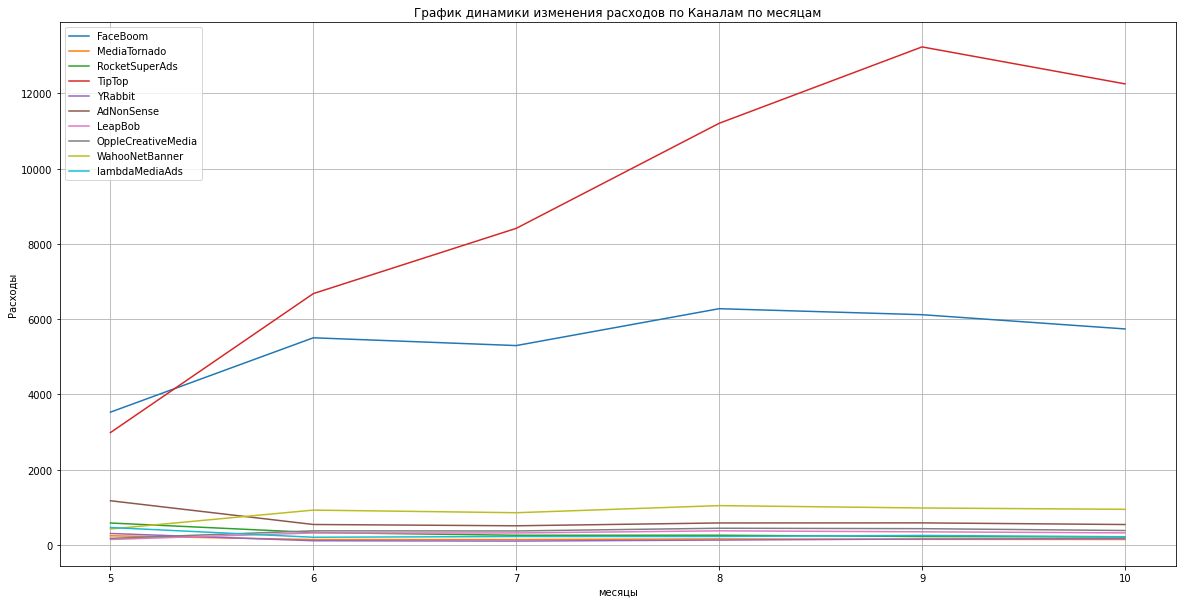

In [47]:
for source in costs['channel'].unique():
    costs_month[source].plot(grid = True, label=source, figsize=(20, 10))
plt.legend()
plt.xlabel('месяцы')
plt.ylabel('Расходы')
plt.title('График динамики изменения расходов по Каналам по месяцам')
plt.show() 

По месяцам такая же картина - расходы на TipTop и FaceBoom растут. Остальные каналы мало зайдействованы. Больше похоже, что 8 других каналов присутствуют для "галочки".

###  Стоимость привлечения одного пользователя (CAC) из каждого канала

In [48]:
cac = channel_table.merge(costs.groupby('channel')['costs'].sum(), on = 'channel', how = 'right')
cac['cac'] = cac['costs'] / cac['all_users']
cac['pay_cac'] = cac['costs'] / cac['pay_users']
cac

,all_users,pay_users,pay_proc,costs,cac,pay_cac
channel,,,,,,
AdNonSense,3880,440,11.34,3911.25,1.01,8.89
FaceBoom,29144,3557,12.20,32445.60,1.11,9.12
LeapBob,8553,262,3.06,1797.60,0.21,6.86
MediaTornado,4364,156,3.57,954.48,0.22,6.12
OppleCreativeMedia,8605,233,2.71,2151.25,0.25,9.23
RocketSuperAds,4448,352,7.91,1833.00,0.41,5.21
TipTop,19561,1878,9.60,54751.30,2.80,29.15
WahooNetBanner,8553,453,5.30,5151.00,0.60,11.37
YRabbit,4312,165,3.83,944.22,0.22,5.72


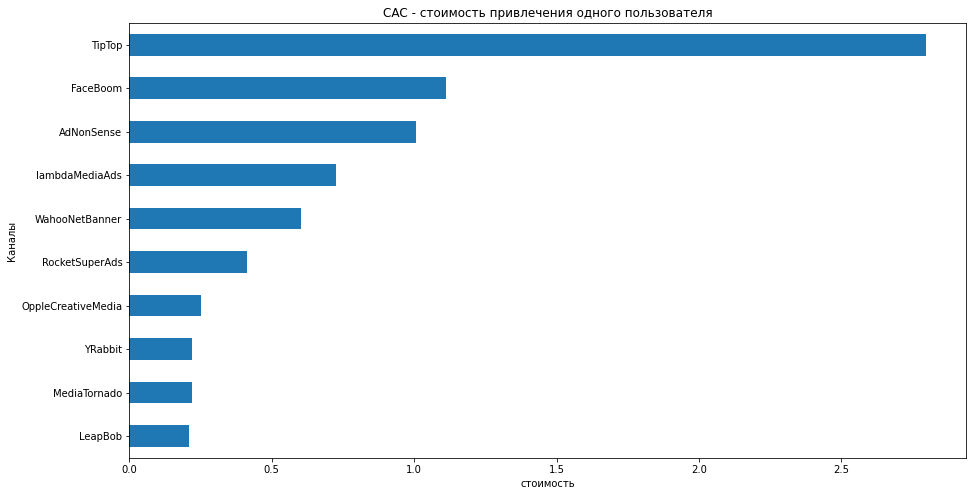

In [49]:
cac['cac'].sort_values().plot(kind='barh', figsize=(15, 8));
plt.title('CAC - стоимость привлечения одного пользователя')
plt.xlabel('стоимость')
plt.ylabel('Каналы')
plt.show()

Привлечение одного пользователя из канала TipTop обходится существенно дороже, чем из остальных каналов. А если учитывать только платящих пользователям - разница еще разительнее.

**Промежуточный итог**


Общая сумма затрат на рекламу за рассматриваемый период составила 105497 тугриков. Всего используется 10 канналов привлечения прользователей. Однако подавляющая доля расходов пришлась только на два канала - TipTop (51%) и FaceBoom (31%). Расходы на эти каналы по неделям немного колеблются, однако от месяца к месяцу наблюдается стабильный рост расходов. Уже сейчас видно, что стоимость привлечения одного пользователя из канала TipTop существенно выше, чем у других каналов. На остальные каналы приходится по 5 и менее проценотв трат, динамики расходов на них практически нет, то есть расходы стабильно около 0.

## Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

### Начальные вводные

Задаем момент анализа из расчета дата максимальных данных привлечения пользователей минус горизонт в 14 дней. 27.10.2019 - 14 =  13.10.2019.

Органических пользователей исключим из анализа. Хотя их доля даже среди платящих пользователей составляет 13%, но в расчет ROI CAC они не попадают, при этом будут давать существенную прибавку в общие показатели.

In [50]:
observation_date = datetime(2019, 10, 13).date()
horizon_days = 14 

### Общие графики окупаемости рекламы

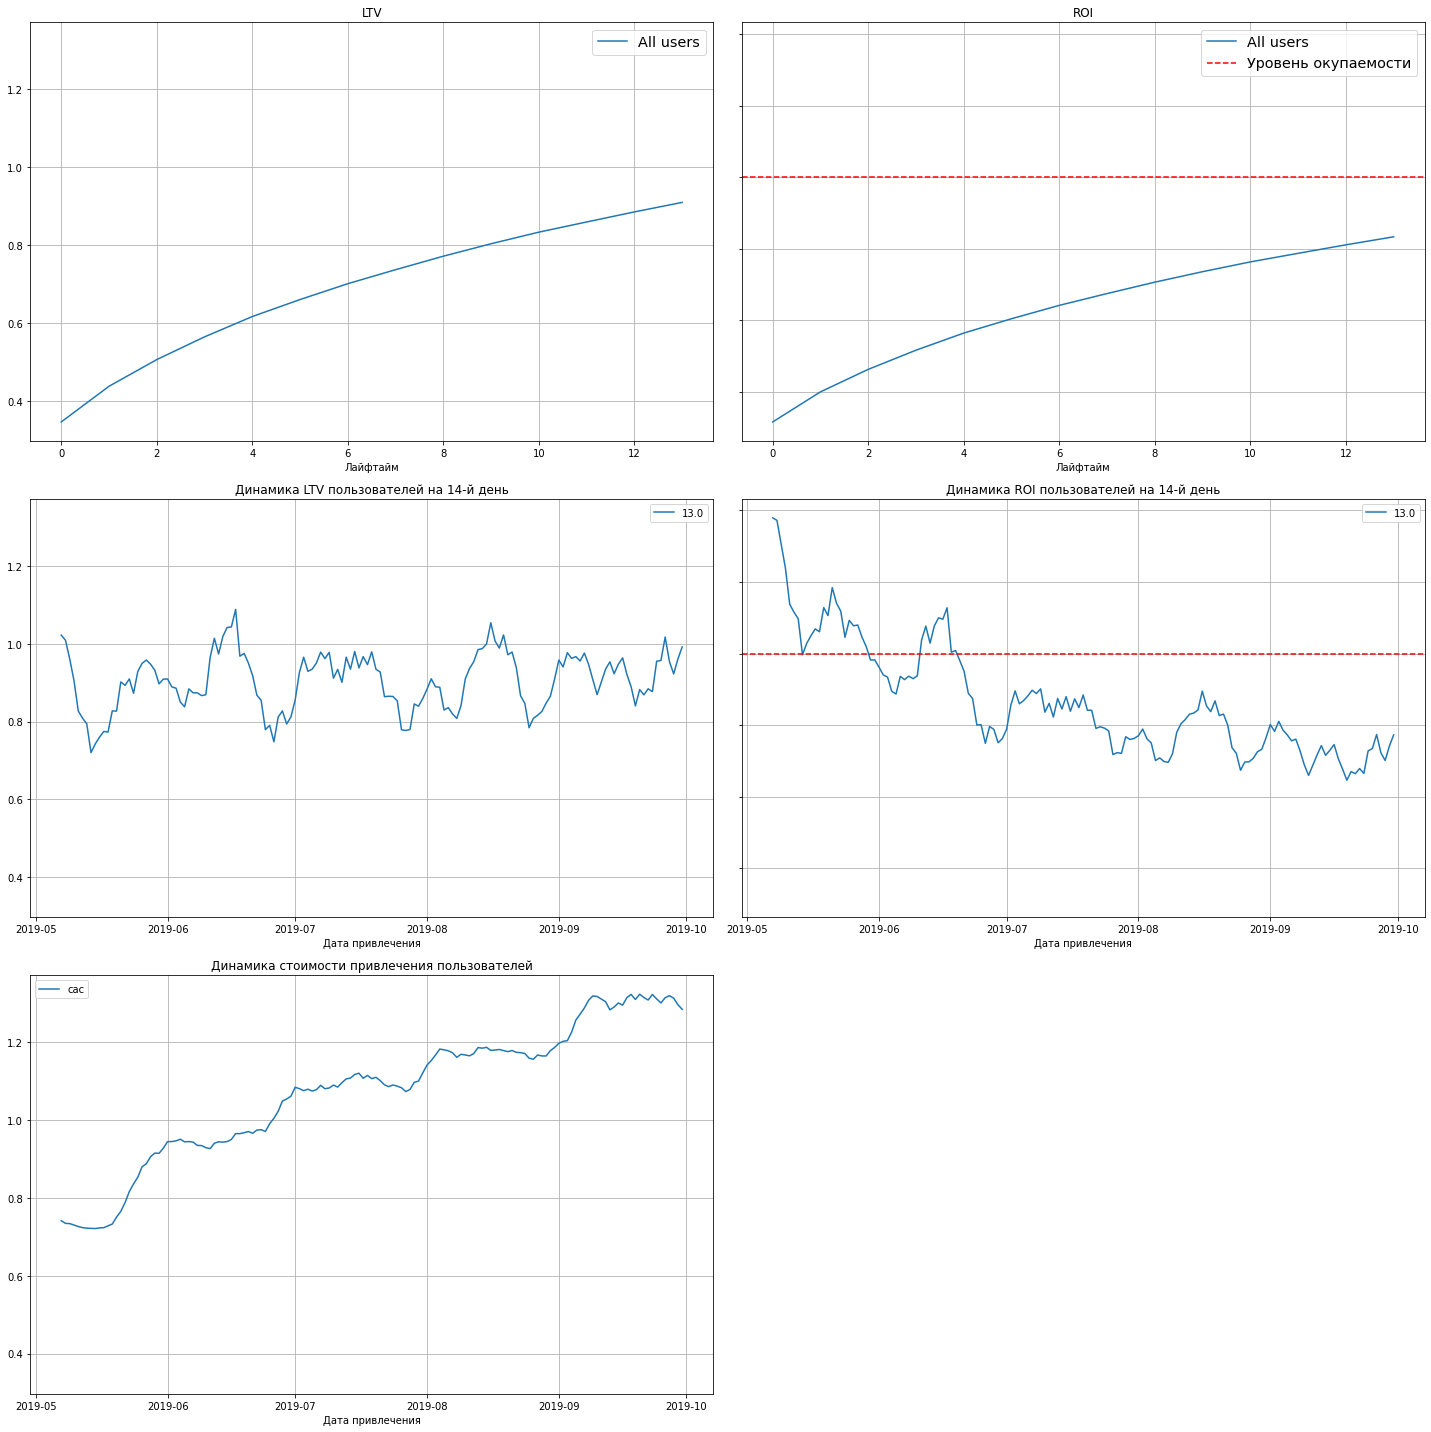

In [51]:
all_ltv_raw, all_ltv_grouped, all_ltv_history, all_roi_grouped, all_roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days
)

plot_ltv_roi(all_ltv_grouped, all_ltv_history, all_roi_grouped, all_roi_history, horizon_days)

In [52]:
all_roi_grouped[13]

cohort
All users   0.83
Name: 13.0, dtype: float64

Даже к 14 дню лайфтама ROI пользоватлей все еще ниже едницы - 0.833. То есть реклама НЕ окупается. Судя по графику динамики ROI, после первых дней запкуска проекта, практически сразу окупаемость пошла на спад. Уже с середины июня ROI 14 дня лайфтайма пользователя стабильно ниже 1. При этом стоимость привлечения пользователей со временем только растет.

Для интереса посмотрим те же данные с учетом органических посетилей 

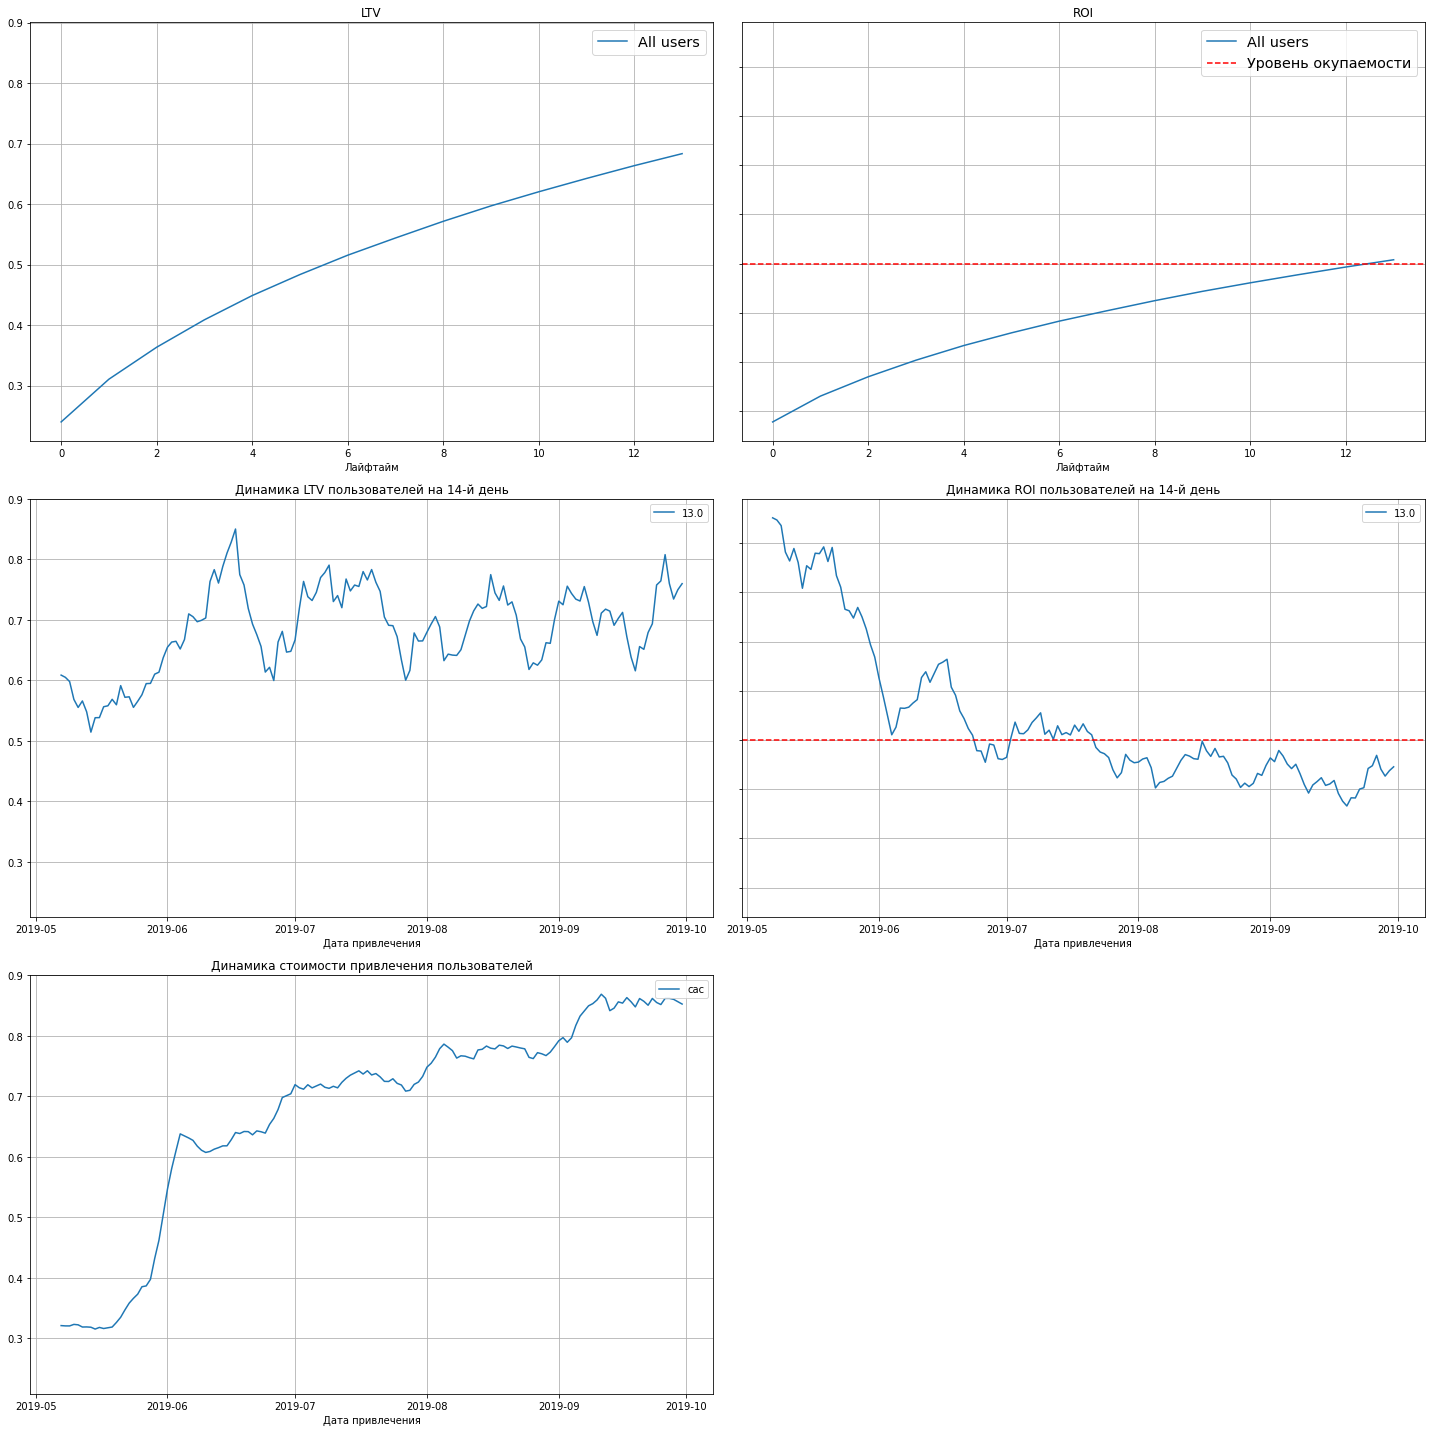

In [53]:
org_ltv_raw, org_ltv_grouped, org_ltv_history, org_roi_grouped, org_roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

plot_ltv_roi(org_ltv_grouped, org_ltv_history, org_roi_grouped, org_roi_history, horizon_days)


С учетом органических пользователей окупаемость хотя бы к 14 дню лайтайма еле-еле превысила единицу. Но это явно не заслуга отдела маркетинга.

### Графики конверсии пользователей

График конверси пользоватлетей вцелом

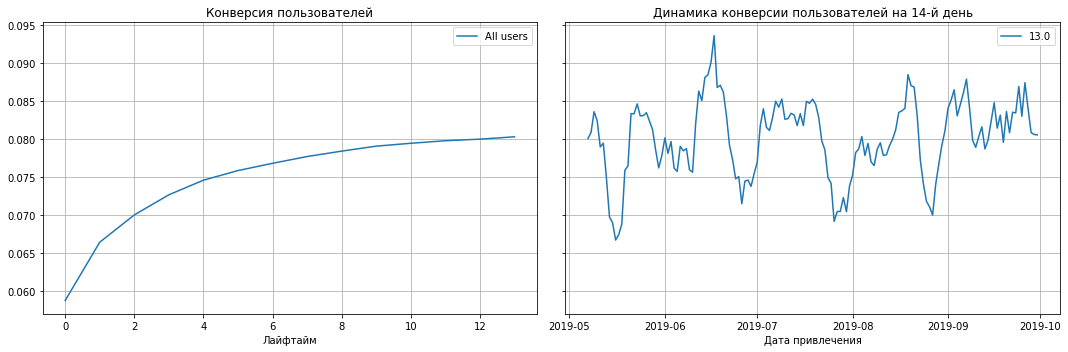

In [54]:
all_conversion_raw, all_conversion_grouped, all_conversion_history = get_conversion(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=[]
)

plot_conversion(all_conversion_grouped, all_conversion_history, horizon_days) 

Графики конверсии выглядят нормально. Конверсия с лайфтайм пользователя - экспоненциально растет. Динамика коверсий на 14 день колеблется вокруг постоянного значения. Значимой тенденции роста или падения на всем промежутке анализа - не прослеживается.

Посмотрим конверсию пользователей с разбивкой по каналам привлечения

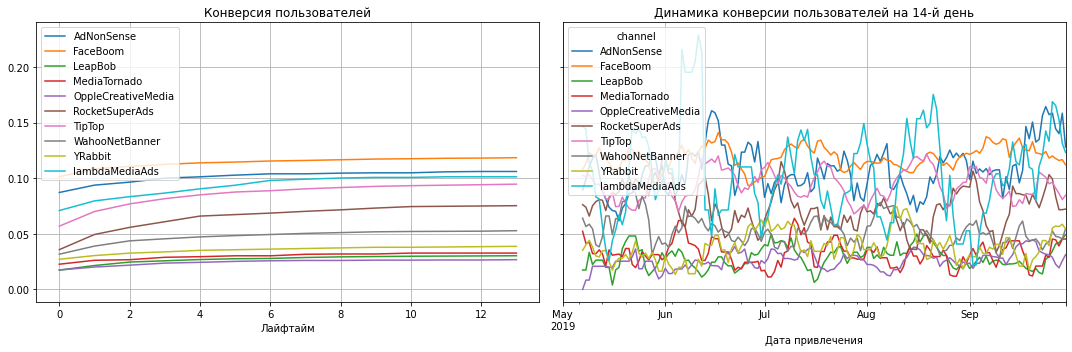

In [55]:
all_conversion_raw, all_conversion_grouped, all_conversion_history = get_conversion(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(all_conversion_grouped, all_conversion_history, horizon_days) 

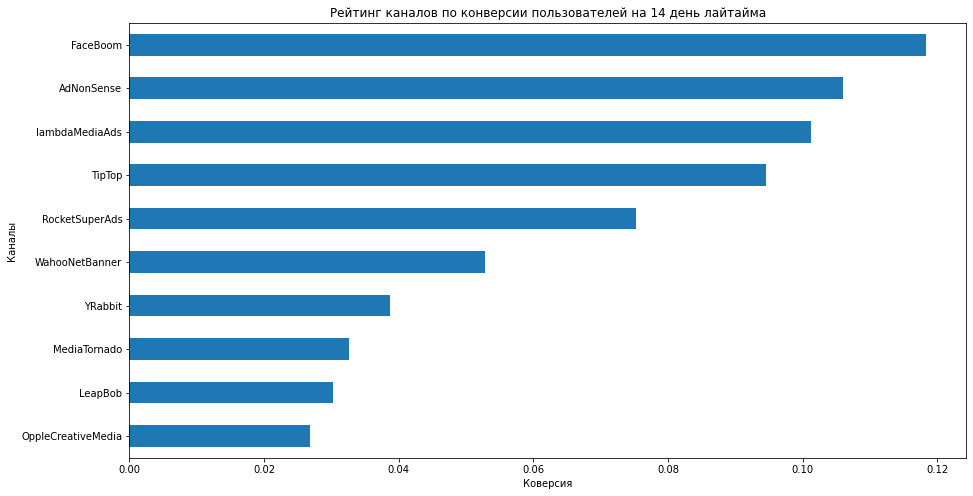

In [56]:
all_conversion_grouped[13].sort_values(ascending=False).sort_values().plot(kind='barh', figsize=(15, 8));
plt.title('Рейтинг каналов по конверсии пользователей на 14 день лайтайма')
plt.xlabel('Коверсия')
plt.ylabel('Каналы')
plt.show()

Каналы FaceBoom, AdNonSense, lambdaMediaAds, TipTop имеют самую высокую конверсию пользователей. При эторм lambdaMediaAds не входит в пятерку каналов по тратам. Может и зря!

### Графики удержания пользователей

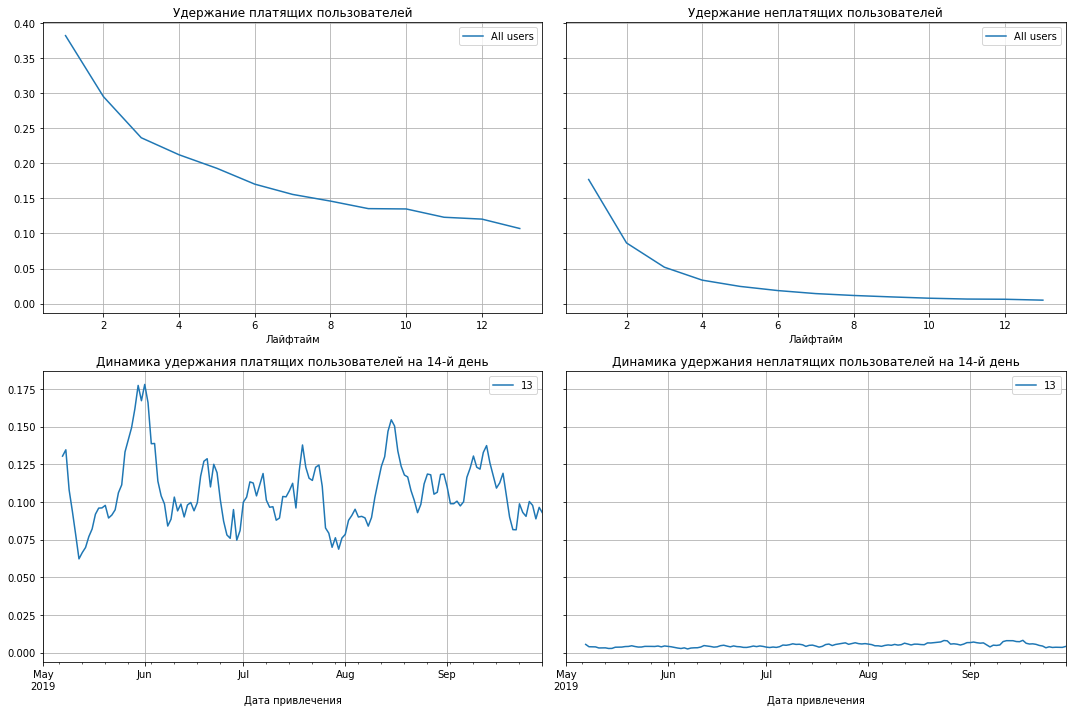

In [57]:
all_retention_raw, all_retention_grouped, all_retention_history = get_retention(
    profiles.query('channel != "organic"'), visits, observation_date, horizon_days, dimensions=[]
)

plot_retention(all_retention_grouped, all_retention_history, horizon_days)

Графики удержания выглядят нормально. Удержание с лайфтайм пользователя - экспоненциально падает. Динамика удержаний на 14 день колеблется вокруг постоянного значения. Значимой тенденции роста или падения на всем промежутке анализа - не прослеживается.

Посмотрим удержание пользователей с разбивкой по каналам привлечения

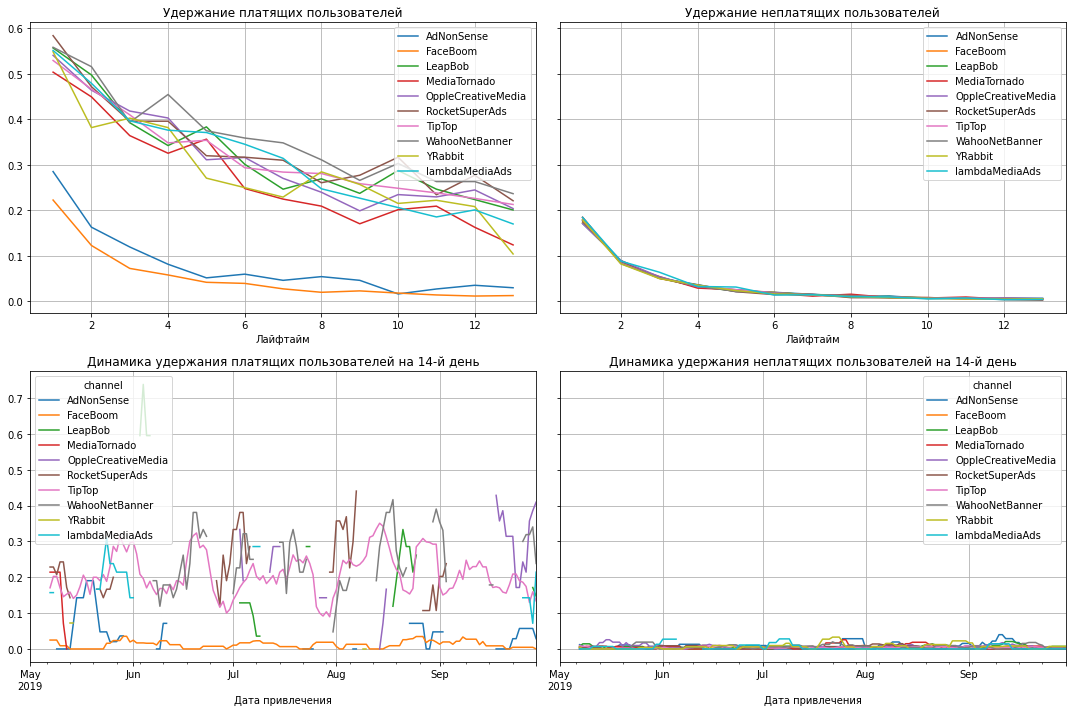

In [58]:
all_retention_raw, all_retention_grouped, all_retention_history = get_retention(
    profiles.query('channel != "organic"'), visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(all_retention_grouped, all_retention_history, horizon_days)

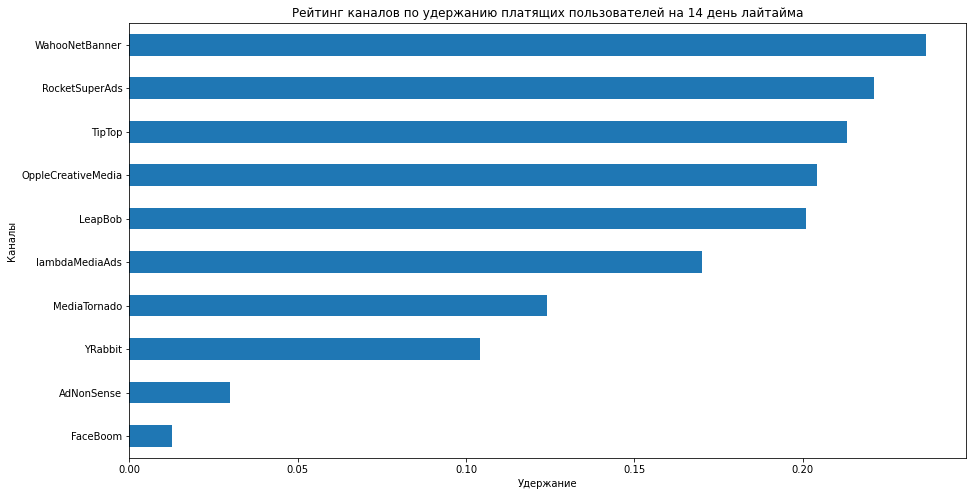

In [59]:
all_retention_grouped.loc[(True)][13].sort_values(ascending=False).sort_values().plot(kind='barh', figsize=(15, 8));
plt.title('Рейтинг каналов по удержанию платящих пользователей на 14 день лайтайма')
plt.xlabel('Удержание')
plt.ylabel('Каналы')
plt.show()

У каналов FaceBoom и AdNonSense заметно хуже удержание платящих пользователей. Примечательно, что у канала FaceBoom самая высокая конверсия, но при этом и самое низкое удержание платящих пользоватлей. Видимо, много пользователей, которые делают одну покупку на пробу и потом больше не возвращаются к приложению.

### Графики окупаемости рекламы по устройствам

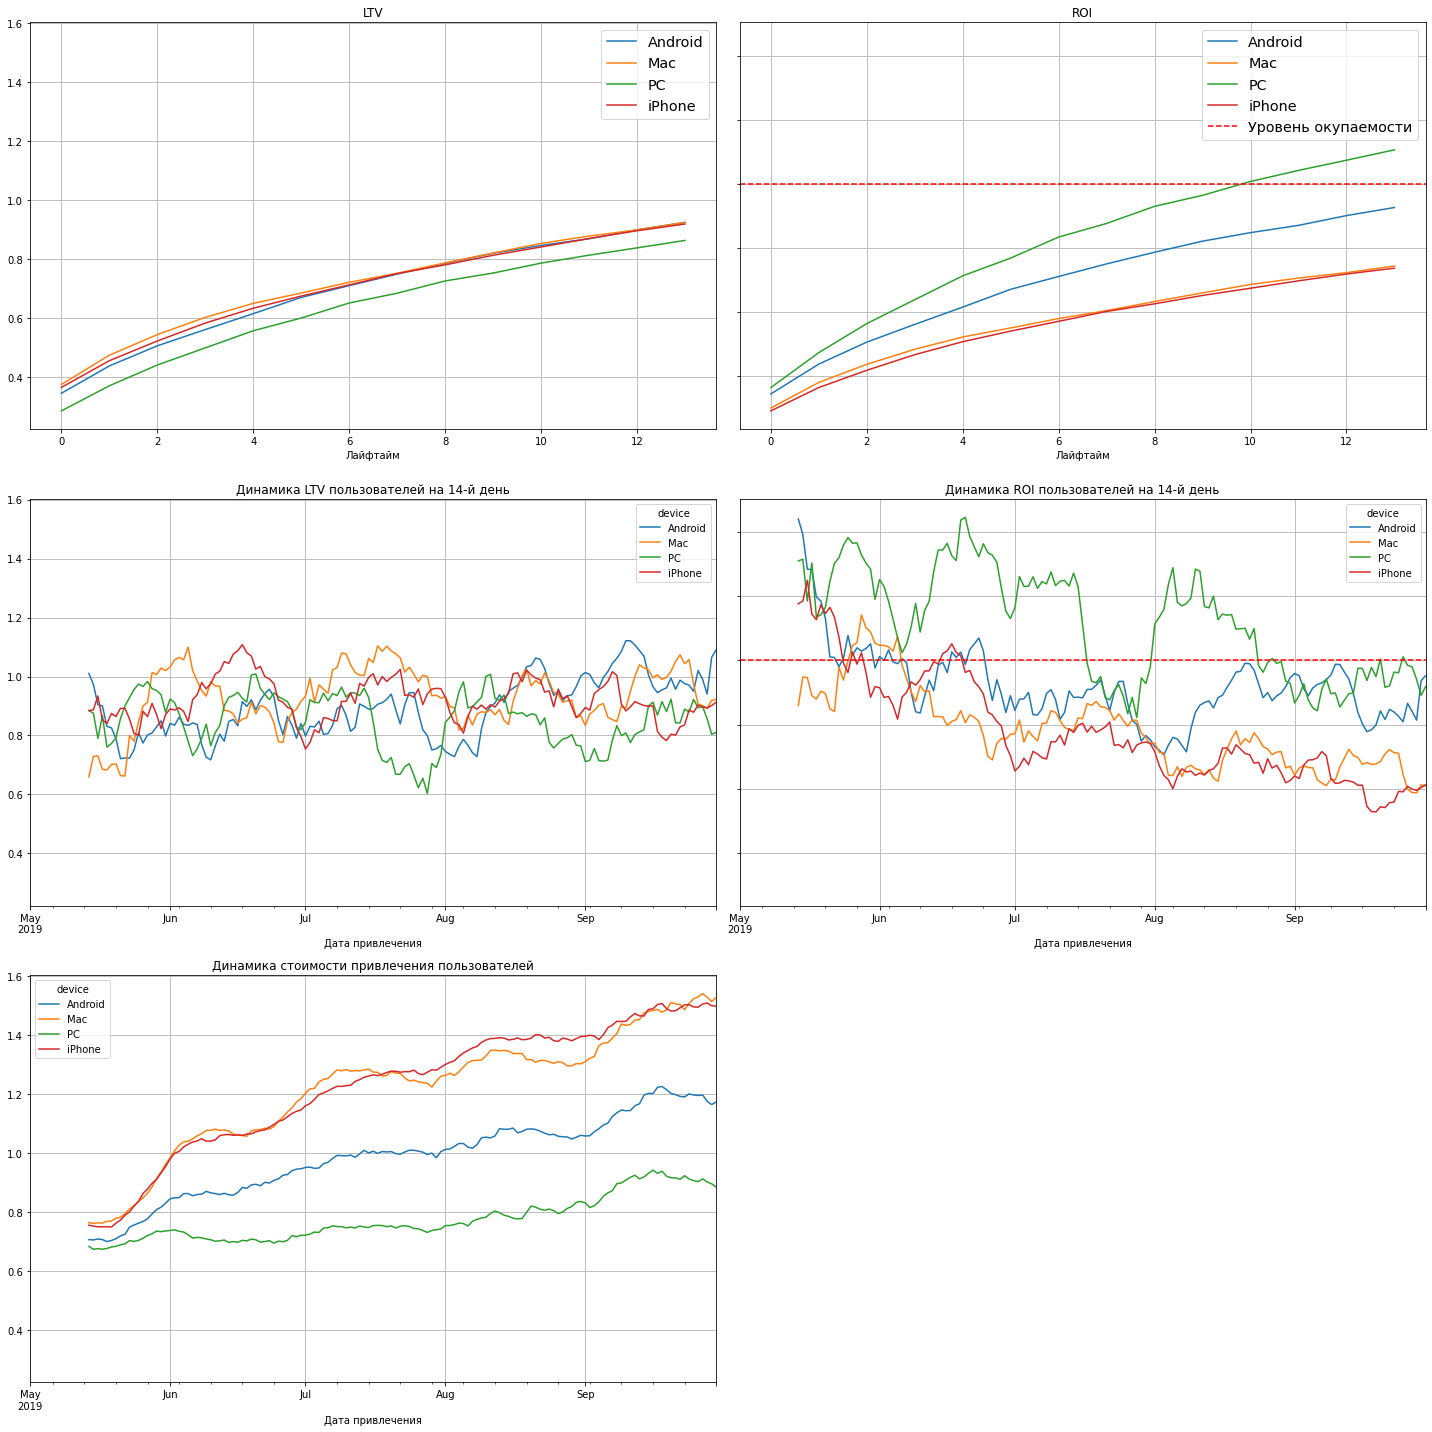

In [60]:
dev_ltv_raw, dev_ltv_grouped, dev_ltv_history, dev_roi_grouped, dev_roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=['device']
)

plot_ltv_roi(
    dev_ltv_grouped, dev_ltv_history, dev_roi_grouped, dev_roi_history, horizon_days, window=14
) 

In [61]:
dev_roi_grouped[dev_roi_grouped[13] < 1][13]

device
Android   0.93
Mac       0.74
iPhone    0.74
Name: 13.0, dtype: float64

В разрезе устройств все пользователи показывают более менее похожую динамику. На 14 день лайфтайма только пользователи с PC превышают ROI в 1. Ходя в динамике и он падает ниже 1. Пользователи с Mac, iPhone и Android в целом к 14 дню лайфтайма так и не достигают ROI в 1.

### Графики окупаемости рекламы по странам

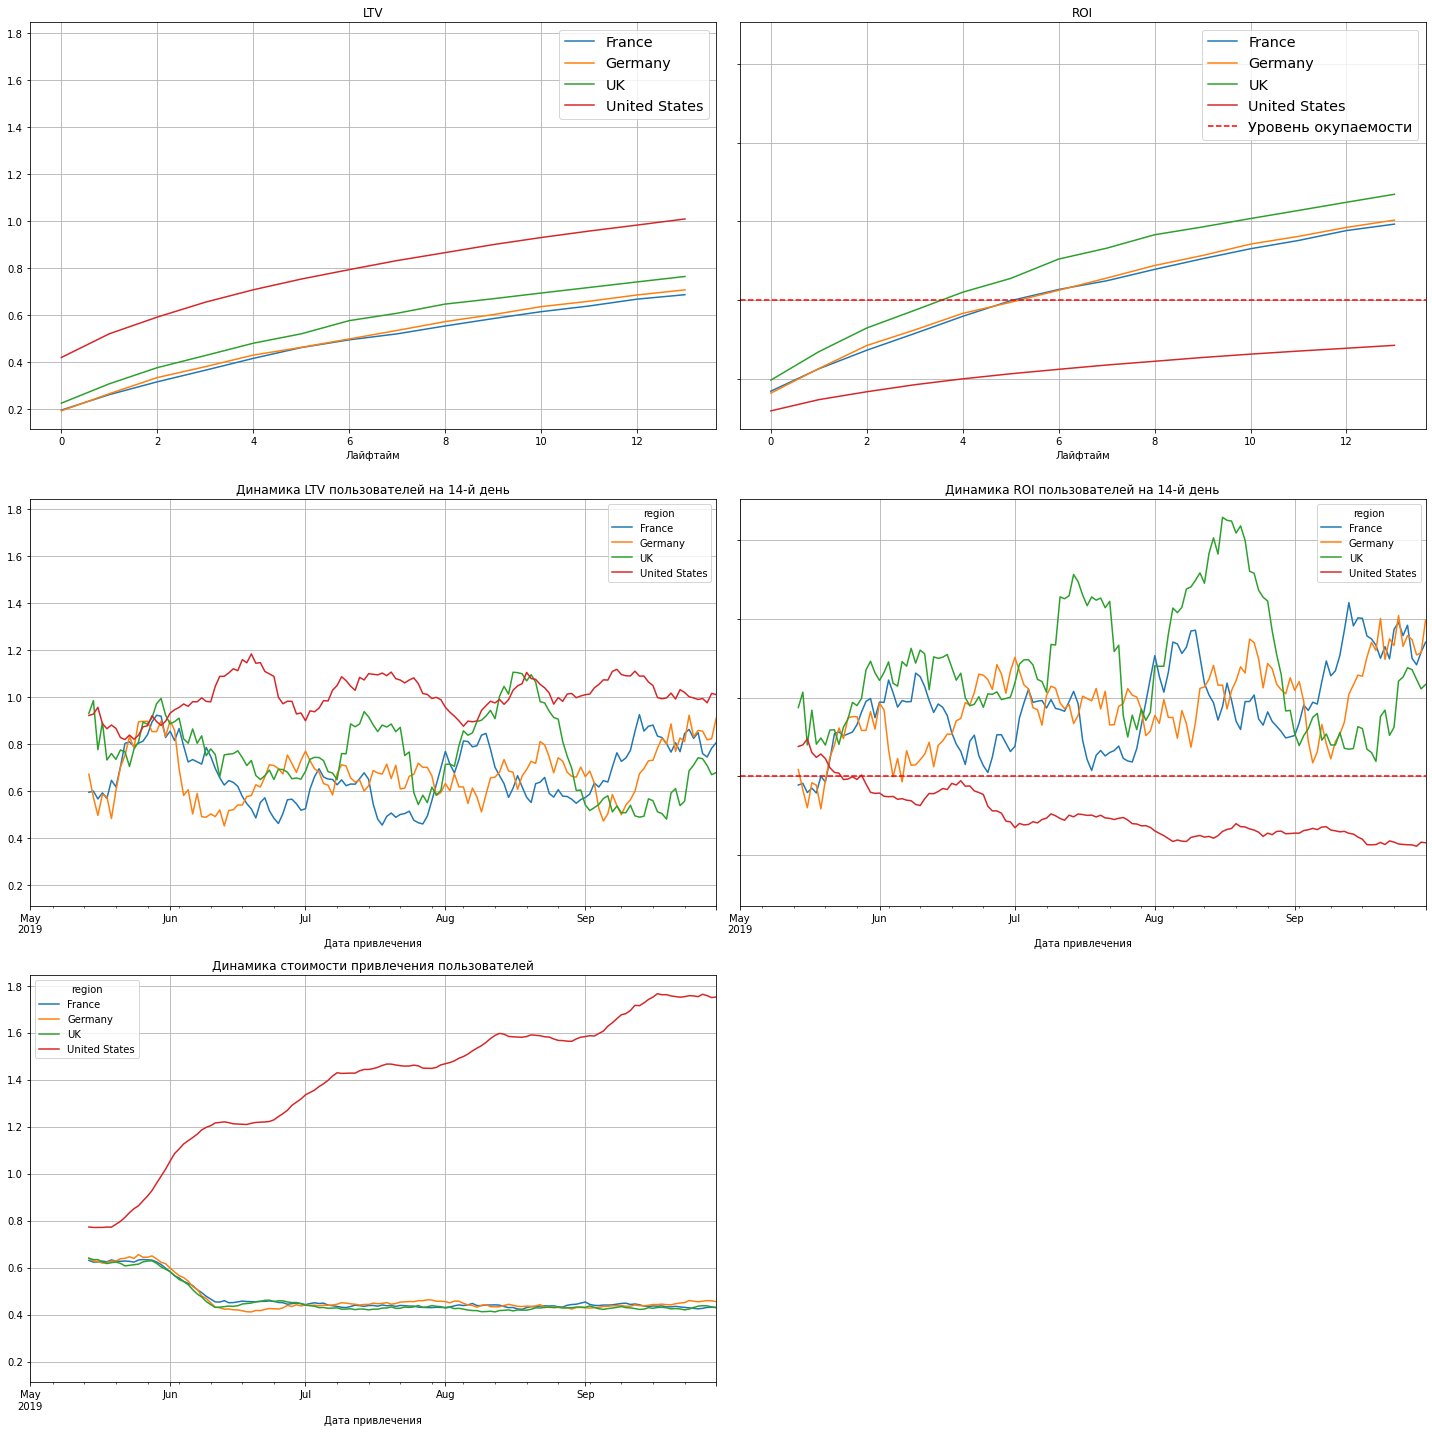

In [62]:
reg_ltv_raw, reg_ltv_grouped, reg_ltv_history, reg_roi_grouped, reg_roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=['region']
)

plot_ltv_roi(
    reg_ltv_grouped, reg_ltv_history, reg_roi_grouped, reg_roi_history, horizon_days, window=14
) 

In [63]:
reg_roi_grouped[reg_roi_grouped[13] < 1][13]

region
United States   0.71
Name: 13.0, dtype: float64

На 14 день лайфтайма пользователи из United States так и не достигают ROI в 1. Судя по графику динамики стоимости привлечения пользователей, реклама сначала еще была нацелена на другие страны, но с середины июня траты на привлечение таких пользователей упали в 1,5 раза, да так и болтаются на низком уровне. Возможно, стоит вновь обратить внимние на пользователй из Франции, Германии и Англии.

### Графики окупаемости рекламы по каналам привлечения

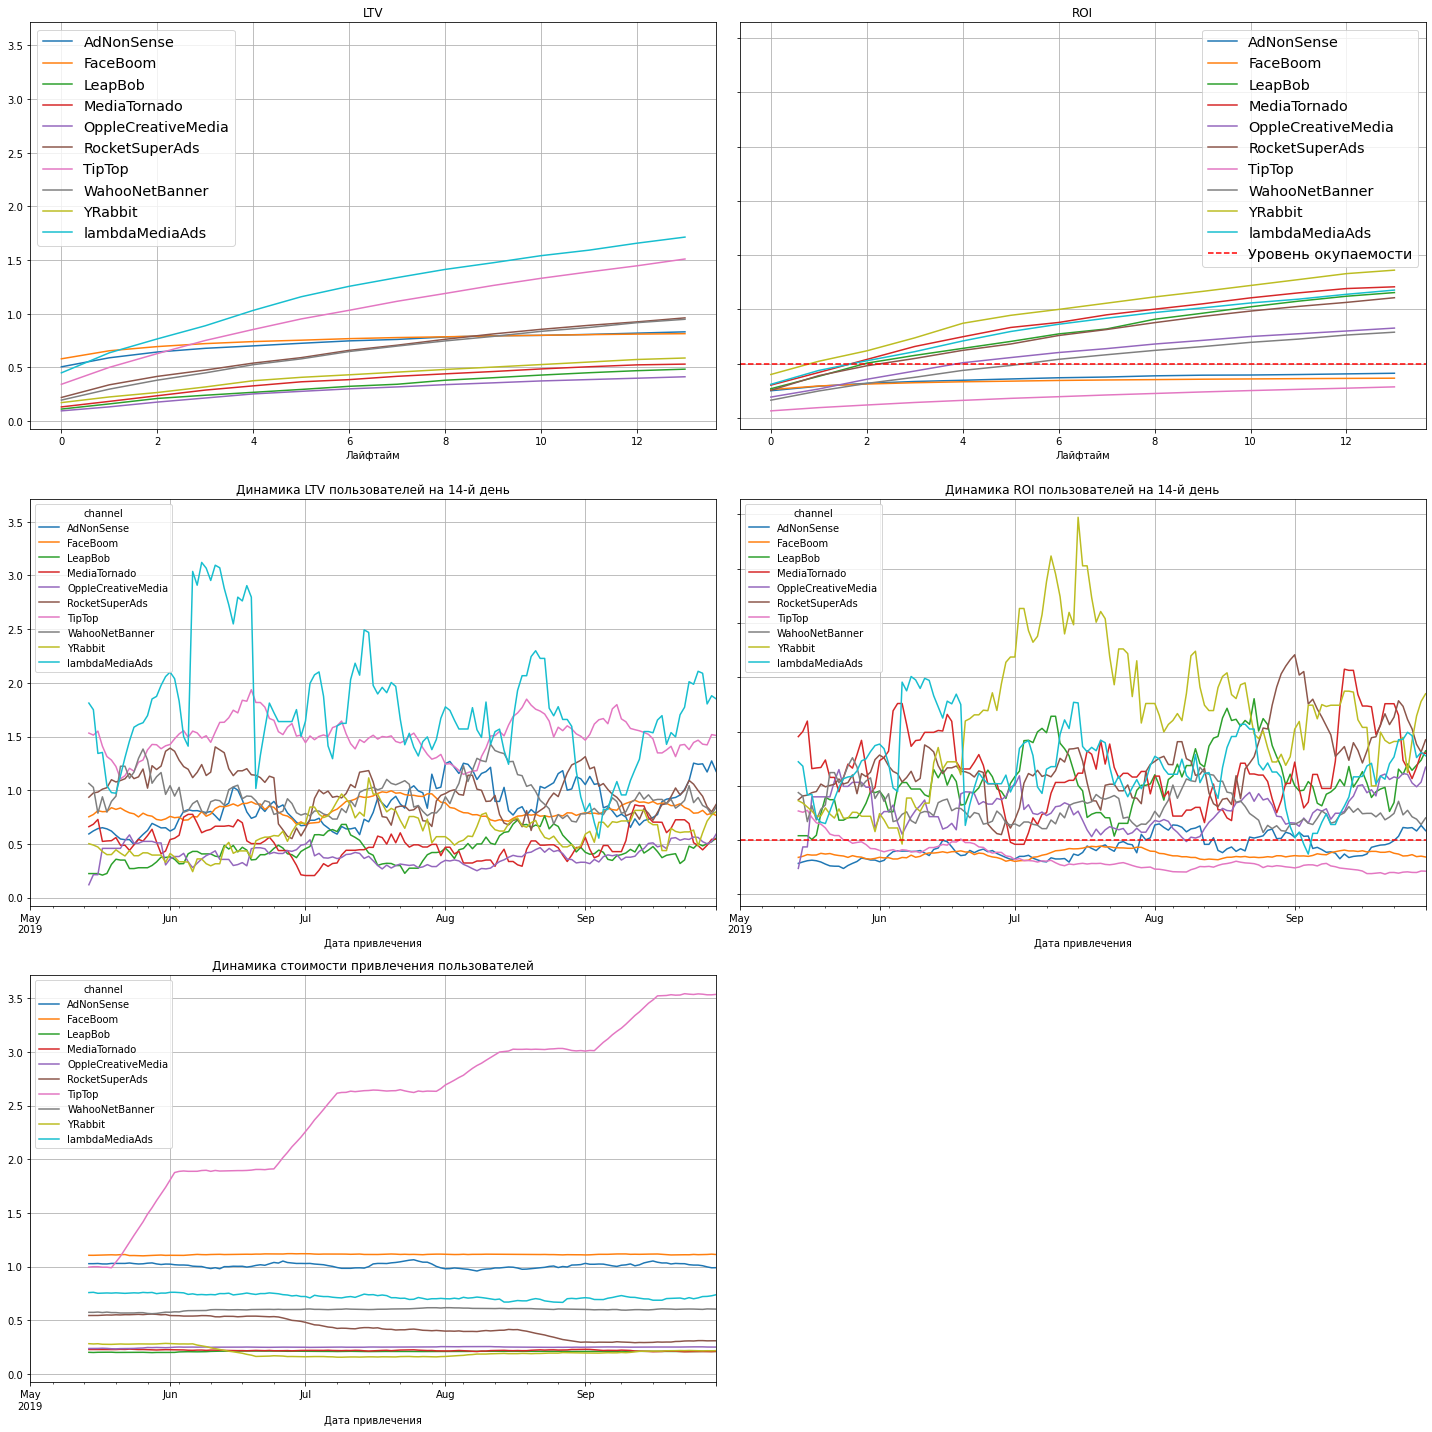

In [64]:
chl_ltv_raw, chl_ltv_grouped, chl_ltv_history, chl_roi_grouped, chl_roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=['channel']
)

plot_ltv_roi(
    chl_ltv_grouped, chl_ltv_history, chl_roi_grouped, chl_roi_history, horizon_days, window=14
) 

In [65]:
chl_roi_grouped[chl_roi_grouped[13] < 1][13]

channel
AdNonSense   0.82
FaceBoom     0.73
TipTop       0.57
Name: 13.0, dtype: float64

Из каналов выделяется три явных аутсайдера. На 14 день лайфтайма пользователи, привлеченные по каналам AdNonSense, FaceBoom, TipTop так и не достигают ROI в 1.

Рассмотрим эти каналы отдельно

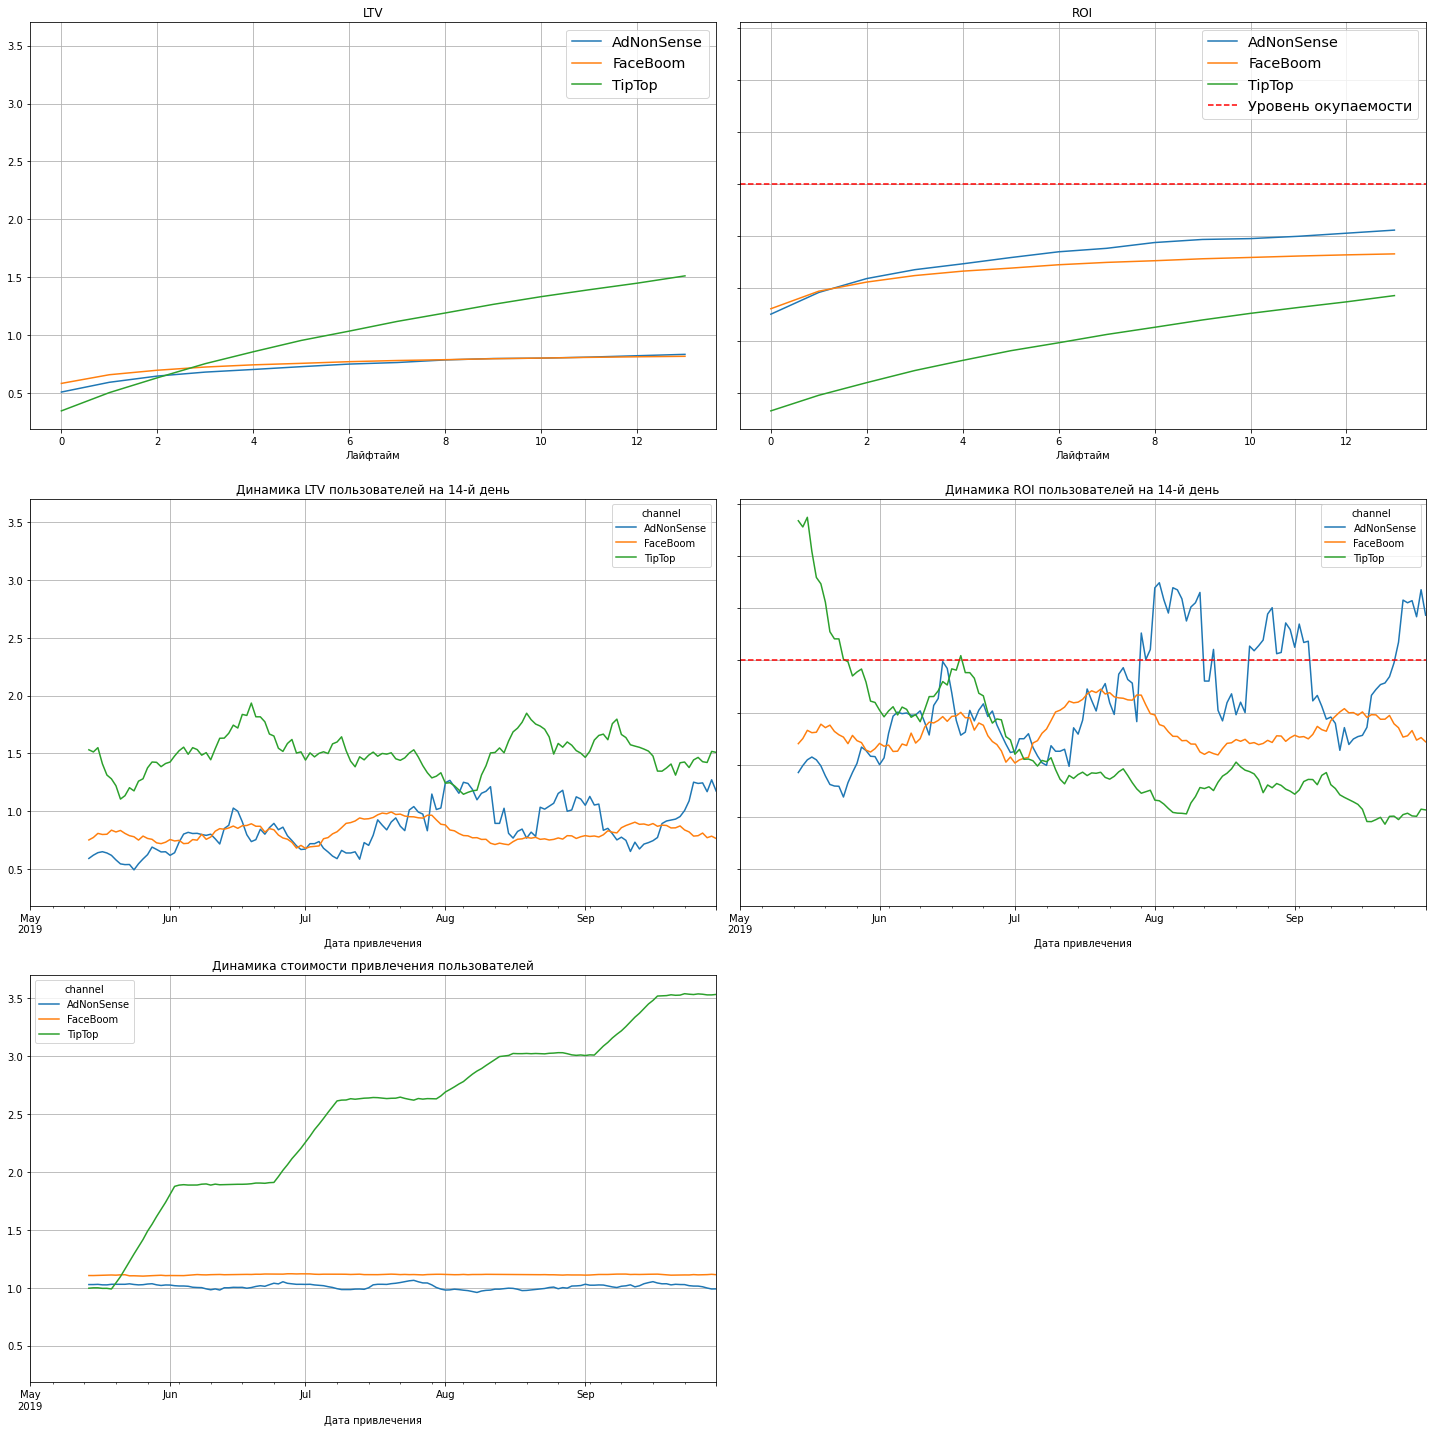

In [66]:
bad_ltv_raw, bad_ltv_grouped, bad_ltv_history, bad_roi_grouped, bad_roi_history = get_ltv(
    profiles.query('channel in ["FaceBoom", "TipTop", "AdNonSense"]'), orders, observation_date, horizon_days, dimensions=['channel']
)

plot_ltv_roi(
    bad_ltv_grouped, bad_ltv_history, bad_roi_grouped, bad_roi_history, horizon_days, window=14
) 

На основе графиков можно сделать выоводы: 
- Канал AdNonSense исправляется и уже три раза выходил в "+", его провал обусловлен не удачным стартом в мае
- За весь период анализа канал FaceBoom так ни разу не вышел в окупаемости пользолвателя на 14 день.
- ROI канал TipTop ушло в пике, при этом траты на этот канал постоянно растут (!)

***Промежуточные выводы***

Как видно из анализа, реклама сервиса не окупается. Только с учетом "органических" пользователей, которые достаются "за бесплатно", окупаемость чуть превышает единицу.

Негативное влияние на окупаемость оказывают, прежде всего, каналы FaceBoom и TipTop, на которые приходится основная часть трат. Первый никода не показывал эффективность, а второй очень быстро стал не эффективными. Возможно, менеджеры отдела маркетига руководствовались высокой конверсией пользователей, привлеченных через эти каналы. Хотя больше похоже на личные субьективные предпочтения.

Также негативно чрезмерный упор рекалмы пользователям в US. Видимо, реклама по этим каналам и территориям уже отработала свое и привлекла практически всех, кто мог заинтересоваться приложением. Давно пора переходить на другие каналы!

### Определим самые перспективные каналы рекламы

Сведем в одну таблицу основные показатели каналов - ROI, LTV, RR, CR на 14 день лайфтайма

In [67]:
best_channels = pd.concat([\
    chl_roi_grouped[13],\
    all_retention_grouped.loc[(True)][13],\
    chl_ltv_grouped[13],\
    all_conversion_grouped[13]],\
    axis=1)
best_channels.columns = ('roi', 'retention', 'ltv', 'cr')

Построим рейтинги каналов по разным показателям

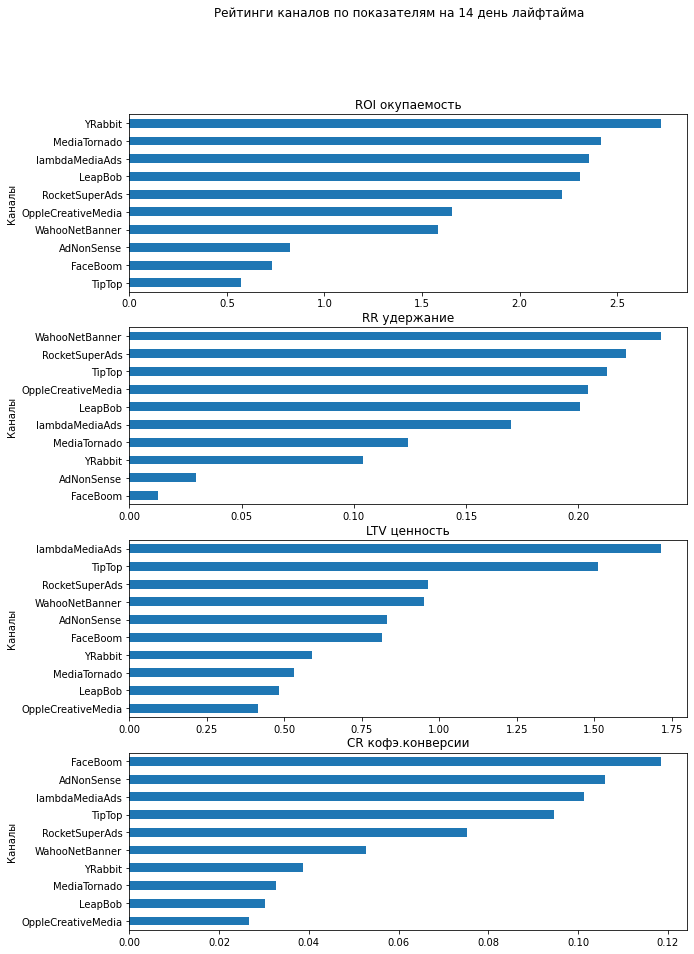

In [68]:
fig, axs = plt.subplots(nrows= 4, ncols= 1, figsize=(10, 15));

ax1 = plt.subplot(4, 1, 1)
best_channels['roi'].sort_values().plot(kind='barh', ax=ax1);
ax1.set_title('ROI окупаемость')
ax1.set_ylabel('Каналы')

ax2 = plt.subplot(4, 1, 2)
best_channels['retention'].sort_values().plot(kind='barh', ax=ax2);
ax2.set_title('RR удержание')
ax2.set_ylabel('Каналы')

ax3 = plt.subplot(4, 1, 3)
best_channels['ltv'].sort_values().plot(kind='barh', ax=ax3);
ax3.set_title('LTV ценность')
ax3.set_ylabel('Каналы')

ax3 = plt.subplot(4, 1, 4)
best_channels['cr'].sort_values().plot(kind='barh', ax=ax3);
ax3.set_title('CR кофэ.конверсии')
ax3.set_ylabel('Каналы')

plt.suptitle('Рейтинги каналов по показателям на 14 день лайфтайма')
plt.show()    

Дополним таблицу местами каналов в рейтингах по отдельным показателям. Просуммируем места каналов в разных рейтингах. Чем меньше сумма, тем больше ТОПовых мест в рейтингах занимал канал - тем лучше канал.

In [69]:
best_channels['roi_r'] = best_channels['roi'].rank(ascending=False)
best_channels['retention_r'] = best_channels['retention'].rank(ascending=False)
best_channels['ltv_r'] = best_channels['ltv'].rank(ascending=False)
best_channels['cr_r'] = best_channels['cr'].rank(ascending=False)
best_channels['sum'] = best_channels['roi_r'] + best_channels['retention_r'] + best_channels['ltv_r'] + best_channels['cr_r']
best_channels[['roi_r', 'retention_r', 'ltv_r', 'cr_r', 'sum']].sort_values(by='sum')

,roi_r,retention_r,ltv_r,cr_r,sum
channel,,,,,
lambdaMediaAds,3.00,6.00,1.00,3.00,13.00
RocketSuperAds,5.00,2.00,3.00,5.00,15.00
WahooNetBanner,7.00,1.00,4.00,6.00,18.00
TipTop,10.00,3.00,2.00,4.00,19.00
YRabbit,1.00,8.00,7.00,7.00,23.00
AdNonSense,8.00,9.00,5.00,2.00,24.00
MediaTornado,2.00,7.00,8.00,8.00,25.00
FaceBoom,9.00,10.00,6.00,1.00,26.00
LeapBob,4.00,5.00,9.00,9.00,27.00


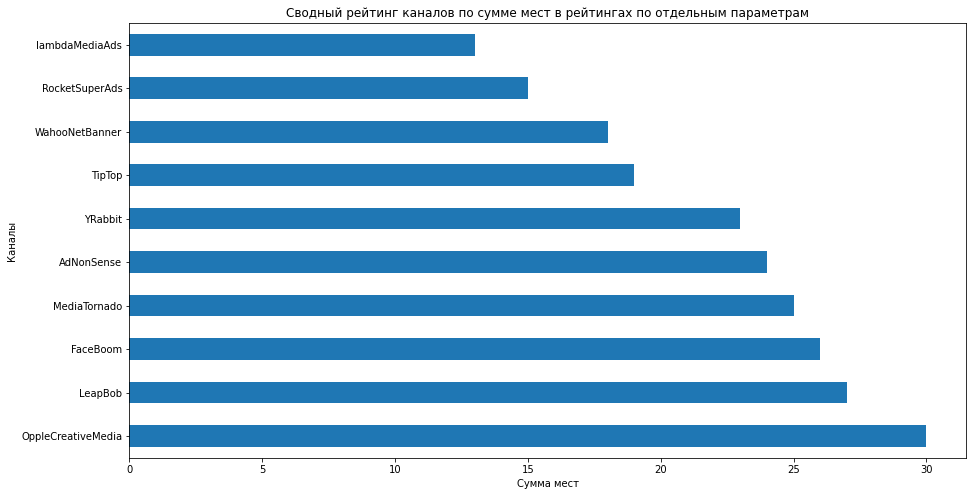

In [70]:
best_channels['sum'].sort_values(ascending=False).plot(kind='barh', figsize=(15, 8));
plt.title('Сводный рейтинг каналов по сумме мест в рейтингах по отдельным параметрам')
plt.xlabel('Сумма мест')
plt.ylabel('Каналы')
plt.show()

Маркетологам можно посоветовать перенести свое внимание с неэффективных каналов привлечения пользователей FaceBoom и TipTop на более каналы, показвающие лучшие результаты: lambdaMediaAds, RocketSuperAds, WahooNetBanner. Также стоит перенести вниманием с пользователей из US на пользователей из других стран. 

## Общие выводы

В итоге проведенного анализа можно сделать следующий выводы: причиной выросших убытков компании стал упорное использование для привлечения пользователей каналов FaceBoom и TipTop, которые если сначала и показывали эффективность, то дольно быстро стали неэффективными. Использование этих уже неэффективных каналов, а значит и траты на них, не только не уменьшались или прекращались, но и наоборот росли со временем. 

Рекомендуем отделу маркетинга использовать для привлечения пользователей каналы lambdaMediaAds, RocketSuperAds, WahooNetBanner, как имеющие наилучщие сочения основных бизнес-метрик. Также отделу маркетинга стоит перенести внимание с пользователей из US на пользователей из других стран. Для этого надо использовать каналы lambdaMediaAds и WahooNetBanner, которые работают в Европе. Канал RocketSuperAds будет привлекать новых пользователей из США.